### Problem Set 2  
#### MACS 30150, Dr. Evans  
#### Nan Ge

#### Question1

In [2]:
from sympy import *
import numpy as np
import math
from matplotlib import pyplot as plt

x = symbols('x')
fx = (sin(x) + 1)**(sin(cos(x)))
dfx = fx.diff(x)
dfx

(-log(sin(x) + 1)*sin(x)*cos(cos(x)) + sin(cos(x))*cos(x)/(sin(x) + 1))*(sin(x) + 1)**sin(cos(x))

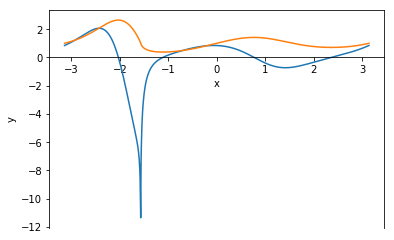

In [2]:
df = lambdify(x, dfx)
f = lambdify(x, fx)
x = np.linspace(-math.pi, math.pi, 1000)

ax = plt.gca()
ax.plot(x, df(x))
ax.plot(x, f(x))
ax.spines["bottom"].set_position("zero")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Question 2

In [3]:
#Each function should accept a function handle f, an array of points x, and a float h; 
#Each should return an array of the difference quotients evaluated at each point in x.
#Different differenciate quotients
def forward(func, x, h=0.05):
    return (func(x+h) - func(x))/h
def forward_center(func, x, h=0.05):
    return (-3*func(x) + 4*func(x+h) - func(x+2*h))/(2*h)
def backward(func, x, h=0.05):
    return (func(x) - func(x-h))/h
def backward_center(func, x, h=0.05):
    return (3*func(x) - 4*func(x-h) + func(x-2*h))/(2*h)
def center2(func, x, h=0.05):
    return (func(x+h) - func(x-h))/(2*h)
def center4 (func, x, h=0.05):
    return (func(x-2*h) - 8*func(x-h) + 8*func(x+h) - func(x+2*h))/(12*h)

In [4]:
#x = symbols('x')
def f(x):
    return (np.sin(x) + 1)**(np.sin(np.cos(x)))
#f = lambdify(x, fx, 'numpy')
#Generates the result of approximation
x_plt = np.linspace(-math.pi, math.pi, 100)
y_plt_fw = forward(f, x_plt)
y_plt_fwc = forward_center(f, x_plt)
y_plt_bw = backward(f, x_plt)
y_plt_bwc = backward_center(f, x_plt)
y_plt_c = center2(f, x_plt)
y_plt_cc = center4(f, x_plt)

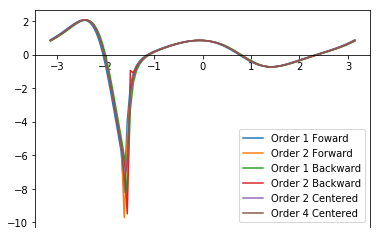

In [299]:
ax = plt.gca()
ax.plot(x_plt, y_plt_fw)
ax.plot(x_plt, y_plt_fwc)
ax.plot(x_plt, y_plt_bw)
ax.plot(x_plt, y_plt_bwc)
ax.plot(x_plt, y_plt_c)
ax.plot(x_plt, y_plt_cc)
plt.legend(['Order 1 Foward', "Order 2 Forward", "Order 1 Backward", "Order 2 Backward", "Order 2 Centered", "Order 4 Centered"], loc = 'lower right')
ax.spines["bottom"].set_position("zero")
plt.show()

#### Question 3

In [228]:
#Exact value of dfx
x = symbols('x')
expr = (sin(x) + 1)**(sin(cos(x)))
dfx = expr.diff(x)
f_ext = lambdify(x, dfx)
x0 = 1
h = np.logspace(-8, 0, 9)
y_ext = f_ext(x0)
y_fw = abs(forward(f, x0, h) - y_ext)
y_fwc = abs(forward_center(f, x0, h) - y_ext)
y_bw = abs(backward(f, x0, h) - y_ext)
y_bwc = abs(backward_center(f, x0, h) - y_ext)
y_c = abs(center2(f, x0, h) - y_ext)
y_cc = abs(center4(f, x0, h) - y_ext)

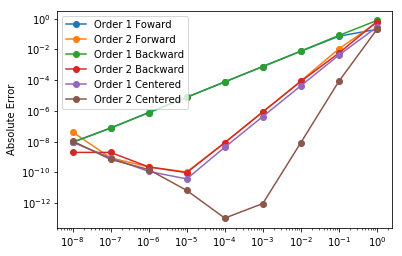

In [229]:
plt.plot(h, y_fw, marker = 'o')
plt.plot(h, y_fwc, marker = 'o')
plt.plot(h, y_bw, marker = 'o')
plt.plot(h, y_bwc, marker = 'o')
plt.plot(h, y_c, marker = 'o')
plt.plot(h, y_cc, marker = 'o')
plt.loglog()
plt.legend(['Order 1 Foward', "Order 2 Forward", "Order 1 Backward", "Order 2 Backward", "Order 1 Centered", "Order 2 Centered"], loc = 'upper left')
plt.ylabel("Absolute Error")
plt.show()

#### Question 4

In [261]:
import pandas as pd
log = pd.DataFrame(np.load('plane.npy'), columns = ['time', 'alpha', 'beta'])
log

,time,alpha,beta
0,7.0,56.25,67.54
1,8.0,55.53,66.57
2,9.0,54.80,65.59
3,10.0,54.06,64.59
4,11.0,53.34,63.62
5,12.0,52.69,62.74
6,13.0,51.94,61.72
7,14.0,51.28,60.82


In [262]:
log['alpha'] = np.deg2rad(log['alpha'])
log['beta'] = np.deg2rad(log['beta'])
log

,time,alpha,beta
0,7.0,0.981748,1.178795
1,8.0,0.969181,1.161866
2,9.0,0.956440,1.144761
3,10.0,0.943525,1.127308
4,11.0,0.930959,1.110378
5,12.0,0.919614,1.095020
6,13.0,0.906524,1.077217
7,14.0,0.895005,1.061509


In [263]:
a = 500
log['x'] = a * np.tan(log['beta'])/(np.tan(log['beta'])-np.tan(log['alpha']))
log['y'] = a * np.tan(log['beta'])*np.tan(log['alpha'])/(np.tan(log['beta'])-np.tan(log['alpha']))
log

,time,alpha,beta,x,y
0,7.0,0.981748,1.178795,1311.271337,1962.456239
1,8.0,0.969181,1.161866,1355.936476,1975.114505
2,9.0,0.956440,1.144761,1401.918398,1987.346016
3,10.0,0.943525,1.127308,1450.497006,2000.840713
4,11.0,0.930959,1.110378,1498.640350,2013.512411
5,12.0,0.919614,1.095020,1543.798955,2025.792234
6,13.0,0.906524,1.077217,1598.041382,2040.990583
7,14.0,0.895005,1.061509,1647.596093,2055.065571


In [285]:
log['x_prime']=(log.x.shift(-1)-log.x.shift())/2
log['y_prime']=(log.y.shift(-1)-log.y.shift())/2
log.loc[0, 'x_prime'] = log.x[1]-log.x[0]
log.loc[7, 'x_prime'] = log.x[7]-log.x[6]
log.loc[0, 'y_prime'] = log.y[1]-log.y[0]
log.loc[7, 'y_prime'] = log.y[7]-log.y[6]
log['speed'] = np.sqrt(np.power(log.x_prime, 2) + np.power(log.y_prime, 2))
log

,time,alpha,beta,x,y,x_prime,y_prime,speed
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44.665140,12.658266,46.424201
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45.323531,12.444889,47.001039
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47.280265,12.863104,48.998805
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48.360976,13.083197,50.099442
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46.650974,12.475760,48.290351
5,12.0,0.919614,1.095020,1543.798955,2025.792234,49.700516,13.739086,51.564559
6,13.0,0.906524,1.077217,1598.041382,2040.990583,51.898569,14.636669,53.923034
7,14.0,0.895005,1.061509,1647.596093,2055.065571,49.554711,14.074988,51.514801


#### Question 5

In [13]:
#The function Jacobian accepts a function, a point, and returns the approximate Jacobian matrix of this function
def Jacobian(func, x0, h):
    m = len(func)
    n = len(x0)
    variables = set()
    J = zeros(m, n)
    for fi in func:
        variables = variables | fi.atoms(Symbol)
    for i, fi in enumerate(func):
        for j, var in enumerate(variables):
            dfi = simplify((fi.subs(var, var+h)-fi.subs(var, var-h))/(2*h))
            dfidv = lambdify(var, dfi)
            J[i,j] = dfidv(x0[j])
    return J

x,y = symbols('x y')
func1=x**2
func2=x**3-y
print(Jacobian([func1,func2], [1,1], 0.01))

Matrix([[0, 2.00000000000000], [-1.00000000000000, 3.00010000000000]])


Somehow, the atoms(Symbol) function decide that the variables are {y,x}. I consider this is reasonable as the question doesn't specify the order of variables.

#### Question 7

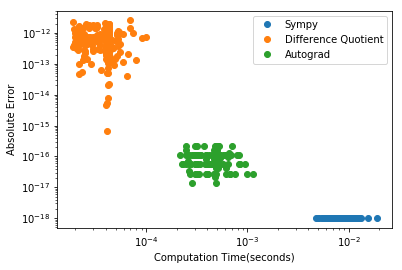

In [14]:
import time
import random
from autograd import grad
from autograd import numpy as npy


def timer(N):
    global diff1, diff2 , time1, time2, time3
    diff1, diff2 = np.zeros(N,dtype='float'), np.zeros(N,dtype='float')
    time1, time2, time3 = np.zeros(N,dtype='float'), np.zeros(N,dtype='float'), np.zeros(N,dtype='float')
    
    #The exact number
    x = symbols('x')
    fx = (sin(x) + 1)**(sin(cos(x)))
    
    #Auto grad
    func = lambda x: (npy.sin(x) + 1)**(npy.sin(npy.cos(x)))
    f_grad = grad(func)
    
    #Difference Quotient
    def func(x):
        return (npy.sin(x) + 1)**(npy.sin(npy.cos(x)))
    
    for i in range(N):
        x0 = np.random.uniform()
        #Sympy
        start1 = time.clock()
        dfx = diff(fx, x)
        f_ext = lambdify(x, dfx)
        y_ext = f_ext(x0)
        end1 = time.clock()
        #Difference Quotient
        start2 = time.clock()
        y_cc = center4(f, x0, h=0.0001)
        end2 = time.clock()
        #Autograd
        start3 = time.clock()
        y_grad = f_grad(x0)
        end3 = time.clock()
        
        time1[i] = end1-start1
        time2[i] = end2-start2
        time3[i] = end3-start3
        diff1[i] = abs(y_ext - y_cc)
        diff2[i] = abs(y_ext - y_grad)
        
    #Plot
    ax = plt.gca()
    ax.loglog(time1, np.array([1e-18]*N),'o', label='Sympy')
    ax.loglog(time2, diff1, 'o', label='Difference Quotient')
    ax.loglog(time3, diff2, 'o', label='Autograd')
    plt.legend(loc='upper right')
    plt.xlabel('Computation Time(seconds)')
    plt.ylabel('Absolute Error')
    #plt.loglog()
    #plt.xlim(10**-5, 10**-1)
    #plt.ylim(10**-18, 10**-7)
    plt.show()
    #print(time2, diff1)
timer(200)

### Part2
#### Question 1